# Linear Regression Assignment
## BoomBikes Case Study

### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands


### Step 1: Data Understanding

In [584]:
# importing required packages for the analysis
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [585]:
# Reading the data set and checking the top 3 rows
bikes_sharing=pd.read_csv("day.csv")
bikes_sharing.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [586]:
# Checking th dimensions of the data provided
bikes_sharing.shape

(730, 16)

In [587]:
# Checking the datatypes for the columns and the null values if any
bikes_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [588]:
# Checking the percentage of null values present for each column in the data
bikes_sharing.isnull().sum()/len(bikes_sharing)*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [589]:
# Checking the stats for the numerical columns present in the data
bikes_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Data Visulaization 

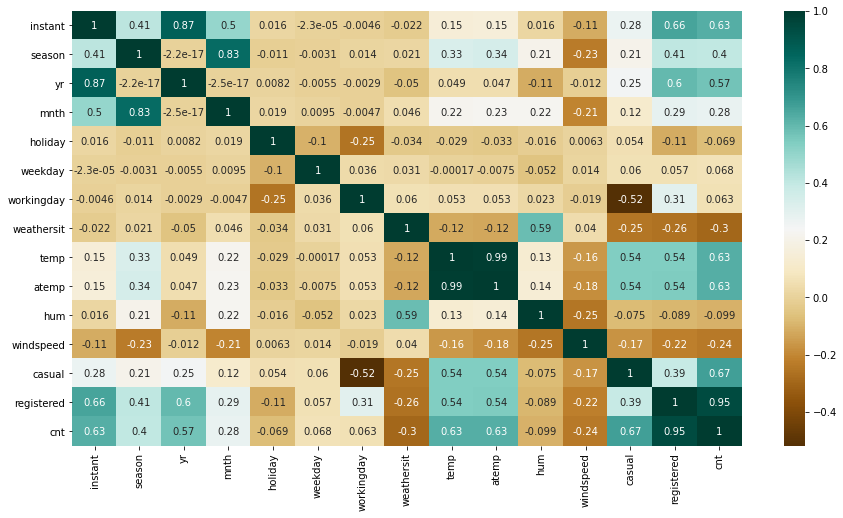

In [590]:
# Checking the coorelation between the variables
plt.figure(figsize=(15,8))
sns.heatmap(bikes_sharing.corr(),cmap='BrBG',annot=True)
plt.show()

#### As seen above there is a high correlation between the temp and atemp varaibles i.e 0.99, based on this correlation value we can drop one of the columns. Moreover as per the data dictionary both are temperatures, one is actual temp and other is feel like temperature

In [591]:
# Removing atemp variable from the dataframe,as variable has correlation of 0.99 with temp
bikes_sharing.pop('atemp')

0      18.18125
1      17.68695
2       9.47025
3      10.60610
4      11.46350
         ...   
725    11.33210
726    12.75230
727    12.12000
728    11.58500
729    11.17435
Name: atemp, Length: 730, dtype: float64

In [592]:
# Checking the dataframe after removing the variable
bikes_sharing.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,120,1229,1349


<Figure size 1440x864 with 0 Axes>

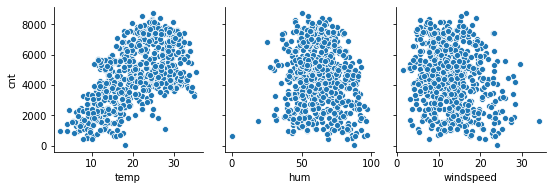

In [593]:
# Plotting a pair plot for the variables present in the data
plt.figure(figsize=(20, 12))
sns.pairplot(bikes_sharing,x_vars=['temp','hum','windspeed'],y_vars=['cnt'])
plt.show()

### Step 3: Data Preparation

In [594]:
# There are certain variables avaialble in the dataset which are not useful for the analysis
# Drop unnecessary variables instant,dteday,casual, registered (since cnt, out target variable is the sum of casual and registered)

unneccessary_columns= ['instant','dteday','casual','registered']
bikes_sharing=bikes_sharing.drop(unneccessary_columns,axis=1)
bikes_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


#### 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them, converting such feature values into categorical string values before proceeding with model building
##### Values for weathersit
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [595]:
# Defining the map for weathersit and converting the values
weather_map={1: "Clear", 2: "Cloudy",3:"Light Snow and Rain",4:"Heavy Snow and Rain"}

bikes_sharing['weathersit']=bikes_sharing.weathersit.map(weather_map)

In [596]:
# checking the rows after mapping of data
bikes_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,Cloudy,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,Cloudy,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,Clear,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,Clear,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,Clear,9.305237,43.6957,12.522300,1600


#### Values for season:
    1:spring, 2:summer, 3:fall, 4:winter

In [597]:
# mapping the numeric values of season to correct category
season_map={1: "Spring", 2: "Summer",3:"Fall",4:"Winter"}
bikes_sharing['season']=bikes_sharing.season.map(season_map)
# checking the rows after mapping of data
bikes_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,1,0,0,0,Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,1,0,1,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,Clear,9.305237,43.6957,12.522300,1600


In [598]:
# Month has integer values, mapping month to the correct category value
month_map={1:"January",
    2:"February",
    3:"March",
    4:"April",
    5:"May",
    6:"June",
    7:"July",
    8:"August",
    9:"September",
    10:"October",
    11:"November",
    12:"December"}

bikes_sharing['mnth']=bikes_sharing.mnth.map(month_map)
# checking the rows after mapping of data
bikes_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,6,0,Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,0,0,Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,1,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,2,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,3,1,Clear,9.305237,43.6957,12.522300,1600


In [599]:
# Mapping weekday to the correct category value
week_map={0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}
bikes_sharing['weekday']=bikes_sharing.weekday.map(week_map)
# checking the rows after mapping of data
bikes_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


#### Data Visulization, after conversion of the numeric to proper category values

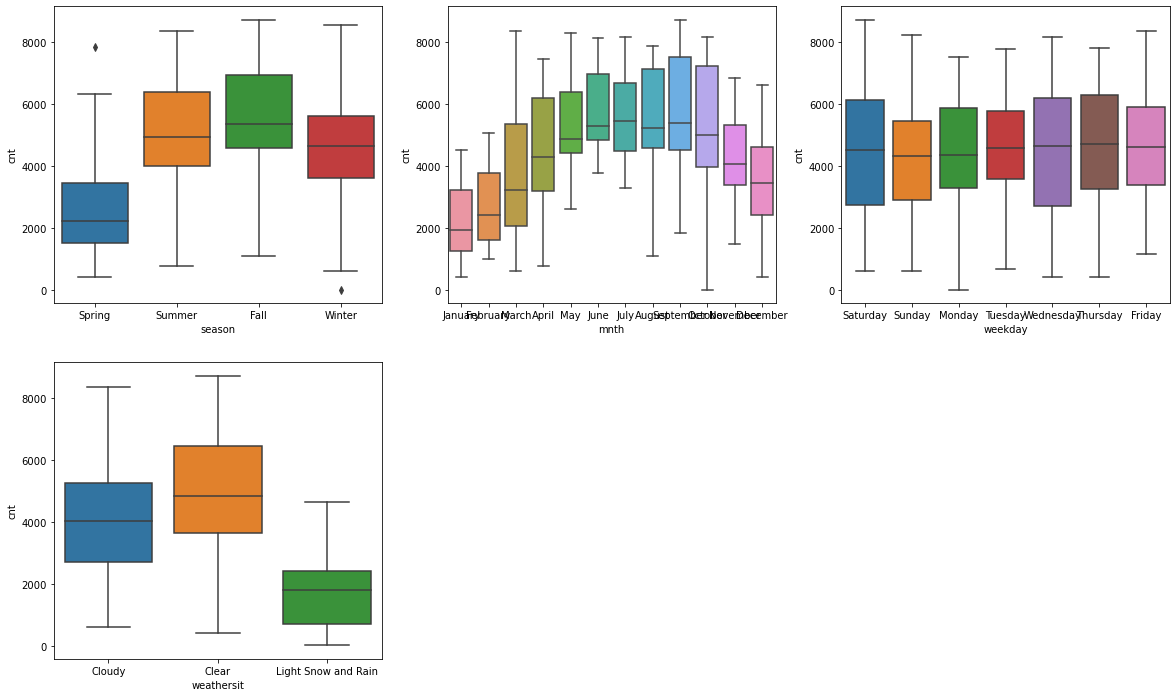

In [600]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes_sharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes_sharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes_sharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes_sharing)
plt.show()

#### Creating Dummy variables for categorical columns

In [601]:
# Creating Dummy variables for Season

# Get the dummy variables for the feature 'season' and store it in a new variable - 'seasons'

seasons = pd.get_dummies(bikes_sharing['season'])

# Check what the dataset 'seasons' looks like
seasons.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [602]:
# Since the number of dummy columns required for the analysis should be n-1, dropping the first column i.e Fall
# as that can be identified with 0000 values

# Let's drop the first column from seasons df using 'drop_first = True'
seasons = pd.get_dummies(bikes_sharing['season'], drop_first = True)

# Add the results to the original housing dataframe
bikes_sharing = pd.concat([bikes_sharing, seasons], axis = 1)

# Now let's see the head of our dataframe.
bikes_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,January,0,Saturday,0,Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,Spring,0,January,0,Sunday,0,Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [603]:
# Drop 'season' as we have created the dummies for it
bikes_sharing.drop(['season'], axis = 1, inplace = True)

bikes_sharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,January,0,Saturday,0,Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,0,January,0,Sunday,0,Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [604]:
# Defining a generic function for converting all the category variables to the dummies and concat with dataframe

def concert_category_to_dummy(dataframe,catgory):
    dummies = pd.get_dummies(dataframe[catgory], drop_first = True)
    dataframe = pd.concat([dataframe, dummies], axis = 1)
    dataframe.drop([catgory], axis = 1, inplace = True)
    return dataframe

# Calling the function for mnth variable
bikes_sharing=concert_category_to_dummy(bikes_sharing,'mnth')

#Checking the dataframe after dummy conversion
bikes_sharing.head()

# Value for the Month of April will be 000000000000

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,...,December,February,January,July,June,March,May,November,October,September
0,0,0,Saturday,0,Cloudy,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sunday,0,Cloudy,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [605]:
# Checking the columns
bikes_sharing.columns

Index(['yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
       'windspeed', 'cnt', 'Spring', 'Summer', 'Winter', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September'],
      dtype='object')

In [606]:
# Calling the function for mnth variable
bikes_sharing=concert_category_to_dummy(bikes_sharing,'weekday')

#Checking the dataframe after dummy conversion
bikes_sharing.columns

# Value for Friday will be 0000000

Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed',
       'cnt', 'Spring', 'Summer', 'Winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [607]:
# Calling the function for mnth variable
bikes_sharing=concert_category_to_dummy(bikes_sharing,'weathersit')

#Checking the dataframe after dummy conversion
bikes_sharing.columns

# Value for the weathersit 'Clear' will be 00

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Spring', 'Summer', 'Winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Cloudy', 'Light Snow and Rain'],
      dtype='object')

In [608]:
# checking the first few rows in the dataframe
bikes_sharing.head(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow and Rain
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Step 4: Splitting the Data into Training and Testing Sets

In [609]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bikes_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features, using Maxmin scaling

In [610]:
# Creating a scaler for the scaling purpose
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [611]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow and Rain
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,1,0


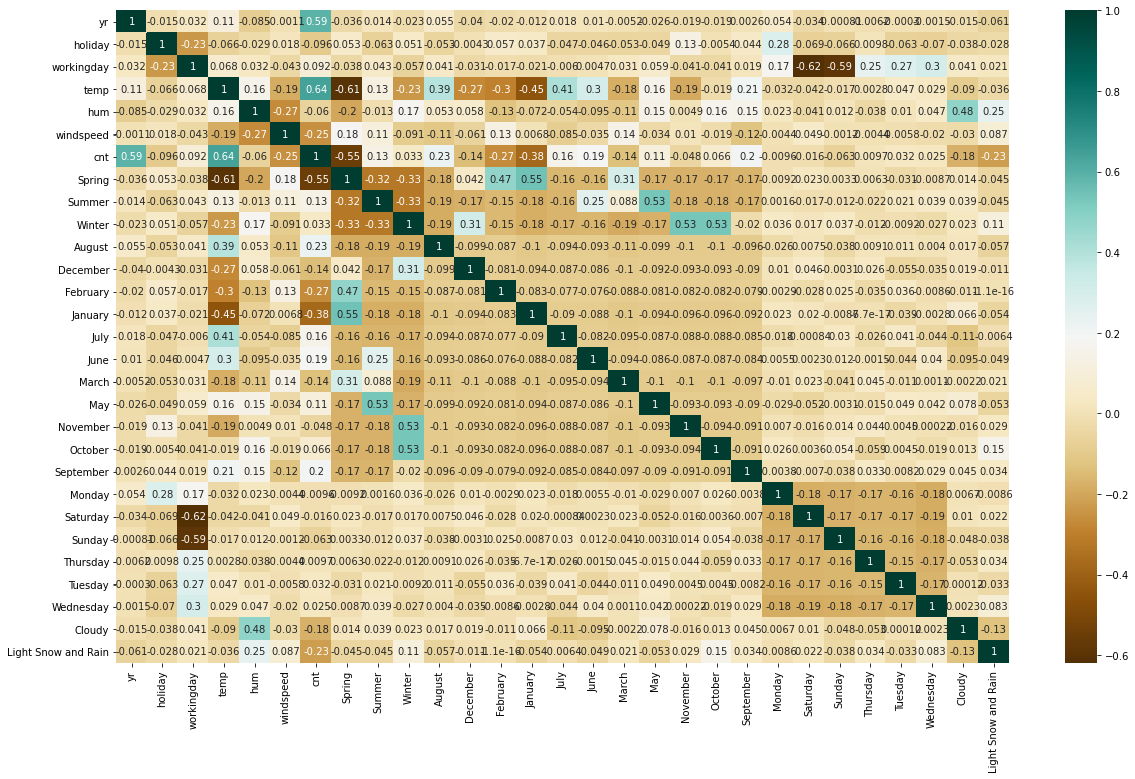

In [612]:
# Checking the coorelation between the variables in training dataframe
plt.figure(figsize=(20,12))
sns.heatmap(df_train.corr(),cmap='BrBG',annot=True)
plt.show()

#### Dividing into X and Y sets for the model building

In [613]:
y_train = df_train.pop('cnt')
X_train = df_train

In [614]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Cloudy',
       'Light Snow and Rain'],
      dtype='object')

### Step 5: Building the model
Using LinearRegression function from SciKit Learn for its compatibility with RFE 

#### Applying RFE

In [615]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [616]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
# Running RFE
rfe = RFE(lm, 10)            
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 3),
 ('Winter', True, 1),
 ('August', False, 11),
 ('December', False, 8),
 ('February', False, 9),
 ('January', False, 6),
 ('July', True, 1),
 ('June', False, 18),
 ('March', False, 19),
 ('May', False, 10),
 ('November', False, 7),
 ('October', False, 15),
 ('September', True, 1),
 ('Monday', False, 13),
 ('Saturday', False, 4),
 ('Sunday', False, 12),
 ('Thursday', False, 16),
 ('Tuesday', False, 14),
 ('Wednesday', False, 17),
 ('Cloudy', False, 2),
 ('Light Snow and Rain', True, 1)]

In [617]:
# Checkng columns not advised by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'Summer', 'August', 'December', 'February', 'January',
       'June', 'March', 'May', 'November', 'October', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Cloudy'],
      dtype='object')

In [618]:
#Checking columns recommended by RFE
supported_cols = X_train.columns[rfe.support_]
supported_cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Winter', 'July',
       'September', 'Light Snow and Rain'],
      dtype='object')

In [619]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,August,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow and Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.243137,0.245098,0.24902,0.096078,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.429398,0.430568,0.43287,0.294988,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Using statsmodels now for detailed statistics

In [620]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[supported_cols]

In [621]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [622]:
# Running the linear model and checking summary
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Fri, 01 Jan 2021   Prob (F-statistic):          1.53e-184
Time:                        20:26:45   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3769    

In [623]:
# Calculate the VIFs for the model, after removing const
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,Spring,2.40
0,yr,2.06
6,Winter,1.98
7,July,1.40
8,September,1.20
9,Light Snow and Rain,1.11
1,holiday,1.04


#### VIF values for hum and temp are greater than 10, it is worth to drop these columns due to the high VIF value, first will drop hum

In [624]:
# Dropping hum column first
X_train_new = X_train_new.drop(['hum'], axis=1)

In [625]:
# Dropping hum column and calculating linear model again
X_train_rfe=X_train_rfe.drop(['hum'], axis=1)
# Running the linear model again and checking summary
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Fri, 01 Jan 2021   Prob (F-statistic):          5.33e-171
Time:                        20:27:15   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2042    

In [626]:
# Calculate the VIFs for the model, after removing hum
def calculate_VIF_for_dataframe(dataframe):
    vif = pd.DataFrame()
    X = dataframe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
    
print(calculate_VIF_for_dataframe(X_train_new))

              Features   VIF
2                 temp  4.40
3            windspeed  3.98
0                   yr  2.06
4               Spring  1.61
5               Winter  1.37
6                 July  1.34
7            September  1.20
8  Light Snow and Rain  1.06
1              holiday  1.04


#### Since all the values of VIF are under 5, no need to drop any feature

In [628]:
# Printing the linear model again and checking the final summary
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Fri, 01 Jan 2021   Prob (F-statistic):          5.33e-171
Time:                        20:29:52   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2042    

### Step 6:Residual analysis of the train data set
This will be done to check the errors are normally distributed

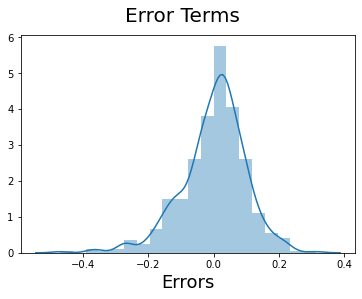

In [629]:
# calculating y (count) values from model and plotting the histogram for errors
y_train_cnt = lm.predict(X_train_rfe)


# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   
plt.show()

#### Above histogram suggests that the errors are normally distributed around the mean value 0

### Step 7: Making Predictions using the model

#### Applying scaling on the test data

In [630]:
# Apply scaler() to all the columns except the 'dummy' variables
df_test[num_vars] = scaler.transform(df_test[num_vars])

# Dividing the test data into x and y
y_test = df_test.pop('cnt')
X_test = df_test

In [631]:
# We will make predictions on the test data

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Prediction cnt values using test data
y_pred = lm.predict(X_test_new)

#### Model evaluation

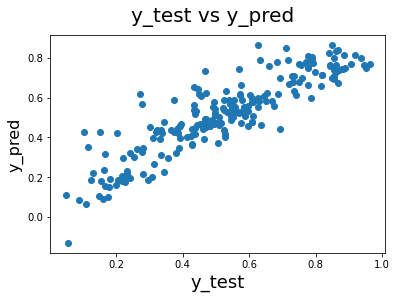

In [634]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [635]:
# Calculating the R-squared on the test data set
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7888115946045292

Equation for finding the total count of bike rentals will be :

cnt= 0.235*yr-0.0862 * holiday+0.4758 * temp - 0.1325 * windspeed - 0.1032 * Spring+0.0504 * Winter-0.0616 * July+0.0498 * September-0.2562 * Light Snow and Rain